# Abalone, abalone, give me the formuoli

We will be looking at a dataset from the UCI machine learning repository called the Abalone Data Set. It can be found here: https://archive.ics.uci.edu/ml/datasets/abalone. Each data point contains multiple physical characteristics of a single abalone, and the goal is to develop a model to predict the number of rings. The number of rings dictates the age of the abalone, so the problem is to develop a model to predict the age of an abalone. Since rings come in integer values, both classification and regression are viable options. In this notebook we will use regression. All lengths in the data set are in millimeters, while all weights are grams. According to the data set description on the website, all continuous values have been scaled down by a factor of 200. 

We will adopt OSEMN pipeline strategy:

1) Obtain the data
2) Scrubbing or cleaning the data. This includes data imputation (filling in missing values) and adjusting column names.
3) Explore the data. Look for outliers or weird data. Explore the relationship between features and output varaibles. Construct a correlation matrix.
4) Model the data (ML, etc).
5) iNterpret the data. What conclusions can we make? What are the most important factors (features)? How are the varaibles related to each other? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

## 1) Obtain the Data
I downloaded the data from the UCI website, saved it as a CSV, and added the headers myself. Now we just load the data.

In [2]:
data = pd.read_csv("abalone.csv")

## 2) Clean The Data
I already added column names (hence the typo in one of the columns!) and missing values were removed before the dataset was added to the UCI repository.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_Weight      4177 non-null float64
Shucked_Weight    4177 non-null float64
Viscera_Weight    4177 non-null float64
SHell_Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## 3) Explore the Data
Let's actually look at the data now.

In [4]:
data.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Two things stands out: first, the minimum height is 0, which must be a typo. Second, the smallest weight is (after rescaling) significantly less than a gram. Let's sort the first few values sorted by height.

In [5]:
data.sort_values(by=["Height"]).head(15)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
3902,I,0.160,0.120,0.020,0.0180,0.0075,0.0045,0.0050,4
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.0060,4
2381,M,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5
3190,I,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100,5


It's just two entries with height 0, so I think it's safe to drop them. While we're here entry 1174 is a clear outlier. Let's handle that later.

In [6]:
data = data.loc[data["Height"] != 0.0]

In [7]:
data.sort_values(by=["Whole_Weight"]).head(15)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


Looking at this table I suspect that the low weight entry is real, since it only has one ring and has small length, diameter, and height. 

Let's construct a correlation matrix and a heatmap for our data.

In [8]:
data.corr()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole_Weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked_Weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera_Weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
SHell_Weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


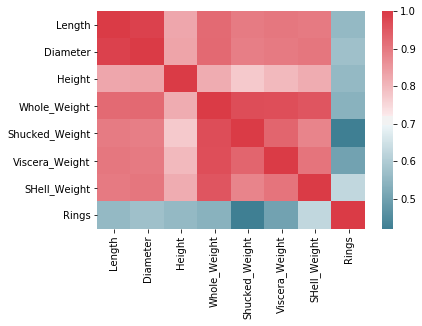

In [9]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Almost everything is strongly correlated with everything else, except ring count! :( Assuming body proportions don't vary much between different abalone this makes sense. 

All of the features features associated with weight are pretty much perfectly correlated with each other, with pearson coefficients > 0.95 for whole weight. This isn't surprising since they're just the weights of different parts of the same abalone. I think we can safely drop the shucked weight, viscera weight, and shell weight and just keep whole weight (PCA is probably overkill).

Length and diameter are just about perfectly correlated. The circumfrence of an ellipse is proportional to its length with the constant of proportionality determined by its eccentricity, so no surprise there. Height is strongly correlated with the remaining features, but not as strongly as, say, length with diameter. We'll replace these three features with their geometric mean. While keeping length, diameter, and height can only help with prediction, I think the benefits gained of an easier to interpret model outweight the marginal gain of predictability from keeping them.

In [10]:
data_trunc = pd.DataFrame({ "Whole_Weight": data["Whole_Weight"],
                           "Char_Len": np.cbrt(data["Length"]*data["Diameter"]*data["Height"]),
                           "Rings": data["Rings"],
                          "Sex": data["Sex"]})

The column name Char_Len means characteristic length.

In [11]:
data_trunc.corr()
#data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

,Char_Len,Rings,Whole_Weight
Char_Len,1.000000,0.593123,0.931968
Rings,0.593123,1.000000,0.540151
Whole_Weight,0.931968,0.540151,1.000000


Whole_Weight and Char_Len are very strongly correlated. We could probably afford to drop one of these as well. Let's plot them against each other.

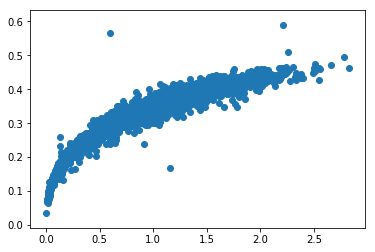

In [12]:
plt.scatter(data_trunc["Whole_Weight"], data_trunc["Char_Len"])

The shape suggests the characteristic length, $\ell$, is related to the weight, $w$, by a power law: $\ell \propto w^{\alpha}$, with $\alpha < 1$. Let's see how well $\alpha = 1/3$ works.

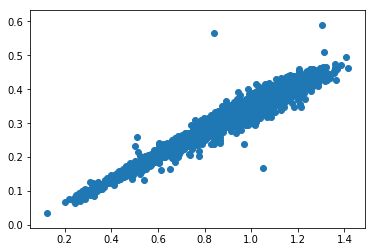

In [13]:
#data_trunc.plot(kind='scatter', x='Whole_Weight', y='Char_Len' )
plt.scatter(np.cbrt(data_trunc["Whole_Weight"]), data_trunc["Char_Len"])

This looks quite linear. We could try fiddling around with the power but this is working well enough that I don't think it's necessary. Rather than keep weight, define $x \equiv w^{1/3}$ and just use that.

In [14]:
data_trunc["x"] = np.cbrt(data_trunc["Whole_Weight"])

Let's see how x is distributed by sex.

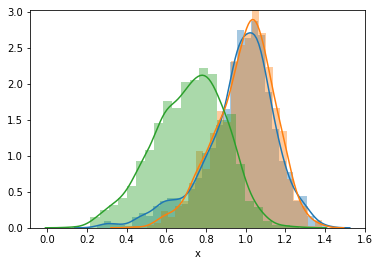

In [15]:
dm = data_trunc.loc[data_trunc["Sex"] == 'M']
df = data_trunc.loc[data_trunc["Sex"] == 'F']
di = data_trunc.loc[data_trunc["Sex"] == 'I']
sns.distplot(dm["x"])
sns.distplot(df["x"])
sns.distplot(di["x"])

It seems that male and female are quite similar physically, while infants are different from either. Let's combine the M and F categories and repllace the sex column with a binary Is_Infant column.

In [16]:
data_trunc["Is_Infant"] = data_trunc["Sex"].map(lambda x: 0 if x=="M" or x=="F"  else 1  )

In [17]:
data_trunc.head()

,Char_Len,Rings,Sex,Whole_Weight,x,Is_Infant
0,0.250809,15,M,0.5140,0.801040,0
1,0.202855,7,M,0.2255,0.608670,0
2,0.310899,9,F,0.6770,0.878071,0
3,0.271781,10,M,0.5160,0.802078,0
4,0.188820,7,I,0.2050,0.589637,1


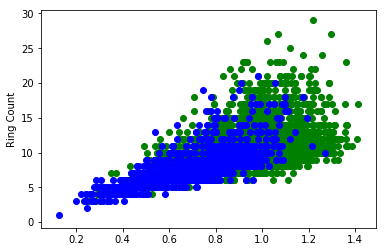

In [18]:
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["x"],
            data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["Rings"], color="green")
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["x"],
            data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["Rings"], color="blue")
plt.ylabel("Ring Count")

We see that there is a fanning effect on ring count, where the scales of the residuals increase as the fitted values increase. To combat this, we wil take the log of ring count.

In [19]:
data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

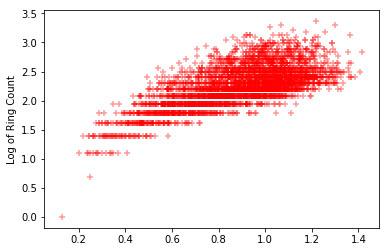

In [20]:
plt.scatter(data_trunc["x"], data_trunc["Log_Rings"], color="red", alpha=0.4, marker='+')
plt.ylabel("Log of Ring Count")

Alright, let's get to modelling the data.

## 4) Model The Data

As a first pass we will model log of ring count with a spline fit by minizing the RSS.

SKlearn doesn't have a method for fitting splines, but SciPy does. The UnivariateSpline function will fit a curve to an input of (x,y) pairs. We can specify the degree of the fitting polynomial, how the knots are chosen, and the smoothing parameter. Let's construct separate splines for the infant and non-infant values.

In [21]:
non_inf_data = data_trunc.loc[data_trunc["Is_Infant"] == 0]
non_inf_data = non_inf_data.sort_values(by=["x"], ascending=False)

inf_data = data_trunc.loc[data_trunc["Is_Infant"] == 1]
inf_data = inf_data.sort_values(by=["x"], ascending=False)



X_ni = non_inf_data["x"].as_matrix().reshape(-1,1)
y_ni = non_inf_data["Log_Rings"].as_matrix().reshape(-1,1)

X_i = inf_data["x"].as_matrix().reshape(-1,1)
y_i = inf_data["Log_Rings"].as_matrix().reshape(-1,1)

In [22]:
from sklearn.model_selection import train_test_split

X_ni_train, X_ni_test, y_ni_train, y_ni_test = train_test_split(X_ni,y_ni, test_size=0.2, random_state=42)

X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i,y_i, test_size=0.2, random_state=42)

In [23]:
from scipy.interpolate import UnivariateSpline

spl_ni_3 = UnivariateSpline(X_ni_train, y_ni_train, k=3)
spl_ni_5 = UnivariateSpline(X_ni_train, y_ni_train, k=5)

spl_i_3 = UnivariateSpline(X_i_train, y_i_train, k=3)
spl_i_5 = UnivariateSpline(X_i_train, y_i_train, k=5)

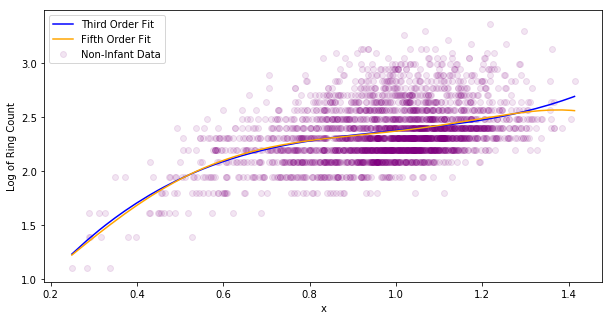

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X_ni, y_ni, color="purple", alpha=0.1, label="Non-Infant Data")
ax.plot(X_ni, spl_ni_3(X_ni), color="blue", label="Third Order Fit")
ax.plot(X_ni, spl_ni_5(X_ni), color="orange", label="Fifth Order Fit")
plt.ylabel("Log of Ring Count")
plt.xlabel("x")
ax.legend(loc="best")

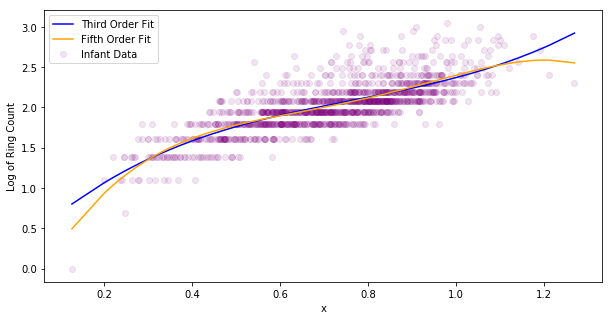

In [25]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X_i, y_i, color="purple", alpha=0.1, label="Infant Data")
ax.plot(X_i, spl_i_3(X_i), color="blue", label="Third Order Fit")
ax.plot(X_i, spl_i_5(X_i), color="orange", label="Fifth Order Fit")
plt.ylabel("Log of Ring Count")
plt.xlabel("x")
ax.legend(loc="best")

For both cases the third order and fifth order fits match each other very closely away from the boundaries. Since a cubic polynomial is simpler we should stick with that. Also the fifth order fit is concave down for large values of x, which makes no physical sense.

We can also adjust the smoothing factor, $\lambda$. Ideally we should choose the value of the smoothing factor using a cross validation set. However when I set the smoothing factor and plot the resulting splines certain values of $x$ don't show up. See the plots below.

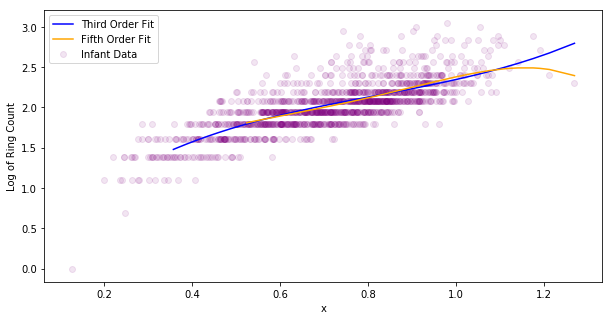

In [26]:
spl_i_3.set_smoothing_factor(0.1)
spl_i_5.set_smoothing_factor(0.1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X_i, y_i, color="purple", alpha=0.1, label="Infant Data")
ax.plot(X_i, spl_i_3(X_i), color="blue", label="Third Order Fit")
ax.plot(X_i, spl_i_5(X_i), color="orange", label="Fifth Order Fit")
plt.ylabel("Log of Ring Count")
plt.xlabel("x")
ax.legend(loc="best")

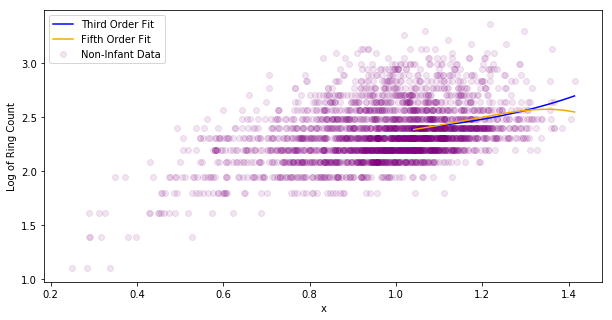

In [27]:
spl_ni_3.set_smoothing_factor(0.1)
spl_ni_5.set_smoothing_factor(0.1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X_ni, y_ni, color="purple", alpha=0.1, label="Non-Infant Data")
ax.plot(X_ni, spl_ni_3(X_ni), color="blue", label="Third Order Fit")
ax.plot(X_ni, spl_ni_5(X_ni), color="orange", label="Fifth Order Fit")
plt.ylabel("Log of Ring Count")
plt.xlabel("x")
ax.legend(loc="best")

Let's try using a GLM for this problem. Rather than treating ring count (or log of ring count) as a continuous variable, let's actually take the fact that they are discrete in account in the model. Denote $\lambda = E(Y|X=x)$ for the conditional expectation value of $Y$, where $Y$ is the ring count. Let's assume that the conditional distribution is Poisson, and we'll use a log link. Then, writing $\lambda = e^{f(x)}$, where $f$ is our model, we have

\begin{equation}
p(y|x) = \frac{\lambda^{y}e^{-\lambda}}{y !}
\end{equation}

It's easy to check that the log-likelihood $\ell$ is given by

\begin{equation}
\ell = \sum_{i} y^{(i)}f(x^{(i)}) - e^{f(x^{(i)})} - \log (y^{(i)}!)
\end{equation}

Taking a derivative with respect to the parameter $\theta$ gives

\begin{equation}
\partial_{\theta}\ell = \sum_{i} \left[ y^{(i)} - e^{f(x^{(i)})} \right] \frac{\partial f}{\partial \theta}(x^{(i)})
\end{equation}

For simplicty, let's take $f(x) = \theta_0 + \theta_1 x$. We could use a spline again, but looking at the plots above I think a linear model should be fine. If we solve the problem with gradient descent, the update procedure is
\begin{gather}
\theta_0 \leftarrow \theta_0 + \frac{\alpha}{m}\sum_{i} \left[ y^{(i)} - e^{f(x^{(i)})} \right] \\
\theta_1 \leftarrow \theta_1 + \frac{\alpha}{m}\sum_{i} \left[ y^{(i)} - e^{f(x^{(i)})} \right]x^{(i)}
\end{gather}

Just for fun, let's see how it does on the infant case (which looks the most linear).



In [80]:
theta0 = 1.0
theta1 = 2.5
#theta2 = 0.5
#theta3 = 0.7

X = inf_data["x"].as_matrix()
Y = inf_data["Rings"].as_matrix()

m = len(X)
alpha = 0.0001

def f(x):
    return theta0 + theta1 * x 

for j in range(10000):
    delta0 = (alpha/m)*np.sum(Y - np.exp(f(X)))
    delta1 =(alpha/m)*np.dot(Y - np.exp(f(X)), X)
    theta0 += delta0
    theta1 += delta1



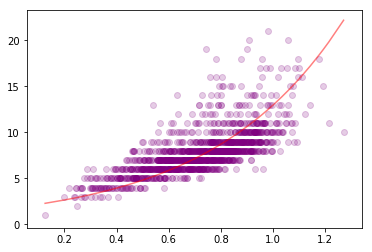

In [86]:
plt.plot(X, np.exp(f(X)) , alpha=0.5, color='red')
plt.scatter(X, Y, alpha = 0.2, color='purple')

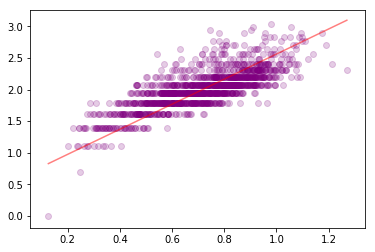

In [88]:
plt.plot(X, f(X), alpha=0.5, color='red')
plt.scatter(X, np.log(Y), alpha = 0.2, color='purple')

It seems to be doing okay, but I think the extra flexibility and local optimization used in the spline is why it worked well, as opposed to finding the most appropriate cost function.

## 5) Interpret the Data
Let's summarize what I did first.

The initial dataset consisted of 7 continuous predictors and a single categorical predictor. The 7 continuous predictors were found to be highly correlated, so I thought it would be a useful simplification to reduce the number of predictors. Three of the predictors were some length scale while the remaining four were weights associated with different processing steps of the abalone. I replaced the three length scales with their geometric mean, which I called $\ell$. I argued that because the whole weight, $w$, was nearly perfectly correlated with the remaining three weights, and because $w$ is the most natural weight scale, we can remove the other three values. Since weight scales with volume, or in this case $w \sim \ell^{3}$, we can keep a single predictor $x \equiv w^{1/3}$ (and sex). Finally, for the predictors considered here, sexual dysmorphia didn't seem to be present, and so I replaced the sex predictor with a binary "is infant".  

When I created a scatter plot for ring count versus $x$, I found that there was a flaring effect present, where the values became increasingly spread out as $x$ increased. To deal with this I took the logarithm of the ring count as the dependent variable. I then partitioned the data into two parts according to the "is infant" variable, and fit separate spline curves to each part. I wanted to add a cross validation set to tune the smoothing paramter but the code was being weird >:( I fit third order and fifth order splines and for both parts found the fifth order fit to have physically undesirable features.

---------------------------------------------------------

One could argue that since the original data set is relatively small and there are only a few features it's unnecessary to trim data out. After all more data gives more predictive power. There are a few reasons why I think it's a good idea to remove some features. First, the whole point of the problem is to predict the number of rings in abalone (and hence the age) in as few steps as possible. Second, since the features are so strongly correlated, any errors in the measurements process could mean an overall loss of information. We can avoid this by just keeping the most information-rich features. Since overall weight is the easiest feature to obtain, I decided to just keep that. Finally, fewer input variables means an easier to interpret model. Even though a spline fit is more complicated than, say, a linear fit, it's still easy to understand what it's doing just by looking at a plot of the curve overlayed on the data.

From the plots above we see that there is still significant variance between the model and the data. I doubt keeping more features would significantly improve this. The authors of the original data set suggest that more information (weather patterns, location, or other features) are necessary to get a really predictive model. Still, we can at least get a qualitative understanding of the relationship between age and weight. 




